In [5]:
# General libraries
import pandas as pd
import numpy as np
from collections import defaultdict
import random
from random import randrange

In [6]:
# dictionaries with the structure source -> array of followings
dictionary = defaultdict(list)
# simple datafram to store the sources and the count of source followings
data = pd.DataFrame([])

file = open('data/train.txt', 'r') 
lines = file.readlines() 
count = 0
for line in lines: 
    count = count + 1
    split_string = list(map(int,line.strip().split("\t")))
    dictionary[split_string[0]] = []
    if (len(split_string) >1):
        dictionary[split_string[0]] = sorted(split_string[1:len(split_string)])
        
    data = data.append(pd.DataFrame({'Source': split_string[0], 'Source_Followings': len(dictionary[split_string[0]]) }, index=[0]), ignore_index=True)


In [12]:
data.tail(10)

,Source,Source_Followings
19990,930244,1326
19991,4230790,133
19992,837929,0
19993,4592066,73
19994,4778890,662
19995,585576,62
19996,505961,537
19997,125824,43
19998,896087,217
19999,3547024,61


In [25]:
# function to calculate followers
def calculateFollowers(data,node):
    followers = 0
    for j in range(0,19999):
        if node in dictionary[data.at[j,'Source']]:
            followers = followers + 1
    
    return followers

# function to calculate followers
def calculateFollowers2(data,node):
    followers = 0
    for j in range(0,19999):
        common_elements = set(dictionary[data.at[j,'Source']]).intersection([node]) 
        followers = followers + len(common_elements)
    
    return followers

In [32]:
calculateFollowers2(data,4778890)

46

In [33]:
calculateFollowers(data,4778890)

46

In [13]:
# random selection of 2000 real edges
real_edges = pd.DataFrame([])
i = 0
while i < 2000:
    if i % 100 == 0:
        print(i)
    x = randrange(0, 19999)
    source = data.at[x,'Source']
    source_followings = data.at[x,'Source_Followings']
    if (source_followings > 0):
        i += 1
        y = random.randint(0, source_followings-1)
        sink = dictionary[source][y]
        source_followers = calculateFollowers(data,source)
        sink_followers = calculateFollowers(data,sink)
        real_edges = real_edges.append(pd.DataFrame({'Source': source,'Sink': sink,
                                                     'Source_Followings': source_followings,
                                                     'Source_Followers': source_followers,
                                                     'Sink_Followers': sink_followers},
                                                    index=[0]), ignore_index=True)

In [15]:
real_edges.head(10)

,Source,Sink,Source_Followings,Source_Followers,Sink_Followers
0,3051068,2465900,94,88,8
1,3458017,376521,28,2,498
2,2034168,846292,131,19,1
3,2611624,751531,4086,105,1
4,135360,620854,2004,333,573
5,2824719,668364,640,24,545
6,4043448,2992163,39,3,443
7,2517243,3470059,44,8,1
8,2539460,3148975,490,36,99
9,4745350,1691921,267,8,50


In [22]:
# Saving real edges
real_edges.to_csv("model_data/real_edges.csv", sep='\t', index=False)

In [4]:
# Reading real edges if they exist
real_edges = pd.read_csv("model_data/real_edges.csv", sep='\t')

In [ ]:
# random creation of 2000 fake edges

minimum = data['Source'].min()
maximum = data['Source'].max()

fake_edges = pd.DataFrame([])
i = 0
while i < 2000:
    if i % 100 == 0:
        print(i)
    
    x = randrange(0, 19999)
    source = data.at[x,'Source']
    source_followings = data.at[x,'Source_Followings']
    
    sink = random.randint(minimum, maximum)
    if sink not in dictionary[source]:
        i += 1
        source_followers = calculateFollowers(data,source)
        sink_followers = calculateFollowers(data,sink)
        fake_edges = fake_edges.append(pd.DataFrame({'Source': source,'Sink': sink,
                                                     'Source_Followings': source_followings,
                                                     'Source_Followers': source_followers,
                                                     'Sink_Followers': sink_followers},
                                                    index=[0]), ignore_index=True)

In [39]:
fake_edges.head()

,Source,Sink,Source_Followings,Source_Followers,Sink_Followers
0,3849054,1039480,13257,417,23
1,2321093,819855,296,53,1
2,3003950,881488,2902,127,42
3,3317623,4126416,471,36,1
4,3914135,4108124,60086,2150,1


In [43]:
fake_edges.to_csv("model_data/fake_edges.csv", sep='\t', index=False)

In [16]:
# Reading test-public data
test_public = pd.read_csv('data/test-public.txt', sep='\t')

# Just for exploration: number of sinks that are source in train file.
count = 0
for index, row in test_public.iterrows():
    if ( (data['Source'] == row['Sink']).any() ):
        count = count + 1

print(count)   

376


In [ ]:
# calculation of features for test data
test_data = pd.DataFrame([])
for index, row in test_public.iterrows():
    if index % 100 == 0:
        print(index)
    source = row['Source']
    source_followings = data.loc[data['Source'] == source, 'Source_Followings'].iloc[0]
    sink = row['Sink']

    source_followers = calculateFollowers(data,source)
    sink_followers = calculateFollowers(data,sink)
    test_data = test_data.append(pd.DataFrame({'Source': source,'Sink': sink,
                                                 'Source_Followings': source_followings,
                                                 'Source_Followers': source_followers,
                                                 'Sink_Followers': sink_followers},
                                                index=[0]), ignore_index=True) 

In [64]:
test_data.head(10)

,Source,Sink,Source_Followings,Source_Followers,Sink_Followers
0,3563811,3600160,19,3,29
1,2052043,1401960,69,13,9
2,4517994,1690636,203,80,16
3,1660006,4349447,504,32,36
4,581111,1882617,16,5,46
5,1039683,1365102,48,5,1
6,4017576,1291219,325,123,8
7,1859935,1059674,161,349,50
8,4337137,3648097,968,99,4
9,2682050,3501635,196,4,60


array([[<AxesSubplot:title={'center':'followers'}>]], dtype=object)

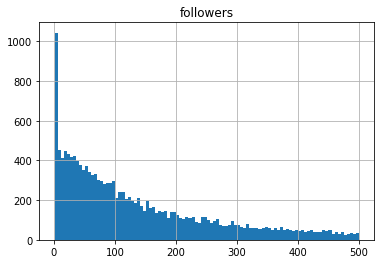

In [65]:
# This was part of the first exploration, maybe it is useful for the report
data.nlargest(50,'followers')
data.hist(column='Source_Followings',bins=100, range=(1,500))

# 